In [59]:
# Dependencies 
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

In [60]:
#Import csv files

# The path to our CSV file
calendar_path = "Resources/CalendarData.csv"
listing_spend_path="Resources/listing_summarydetail_spend.csv"

# Read our airbnb data into dataframes
CalendarData = pd.read_csv(calendar_path)
listing_spend_df=pd.read_csv(listing_spend_path, low_memory=False)
listing_spend_df.head()


,id,Total Spend by ID,Average Spend by ID,Number or Listings by ID,listing_url,scrape_id,last_scraped,name_x,summary,space,...,latitude_y,longitude_y,room_type_y,price_y,minimum_nights_y,number_of_reviews_y,last_review_y,reviews_per_month_y,calculated_host_listings_count_y,availability_365_y
0,2515,26468,90.643836,292,https://www.airbnb.com/rooms/2515,2.017100e+13,10/2/2017,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,...,40.799205,-73.953676,Private room,59.0,2.0,156.0,7/31/2017,1.43,3.0,292.0
1,2539,49446,135.468493,365,https://www.airbnb.com/rooms/2539,2.017100e+13,10/3/2017,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",...,40.647486,-73.972370,Private room,150.0,1.0,7.0,9/17/2017,0.31,7.0,365.0
2,2595,79984,220.341598,363,https://www.airbnb.com/rooms/2595,2.017100e+13,10/2/2017,Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...",...,40.753621,-73.983774,Entire home/apt,225.0,1.0,22.0,9/16/2017,0.23,2.0,363.0
3,3330,23590,70.000000,337,https://www.airbnb.com/rooms/3330,2.017100e+13,10/2/2017,++ Brooklyn Penthouse Guestroom ++,"This is a spacious, clean, furnished master be...","Room Features: - clean, hardwood floors - 2 la...",...,40.708558,-73.942362,Private room,70.0,5.0,24.0,9/30/2016,0.25,3.0,337.0
4,3647,54750,150.000000,365,https://www.airbnb.com/rooms/3647,2.017100e+13,10/2/2017,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,...,40.809018,-73.941902,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0


In [61]:
# change host_id_x data type to float

listing_spend_df['host_id_x'] = listing_spend_df['host_id_x'].astype('float')

In [62]:
listing_spend_df.dtypes

id                                    int64
Total Spend by ID                     int64
Average Spend by ID                 float64
Number or Listings by ID              int64
listing_url                          object
scrape_id                           float64
last_scraped                         object
name_x                               object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id_x                       

In [63]:
#Make a smaller dataframe of the host_id_x information, fewer columns

host_info_df = listing_spend_df[['id','Total Spend by ID','Average Spend by ID','Number or Listings by ID','host_id_x','host_is_superhost','zipcode',
                                'neighbourhood_x','accommodates','bedrooms','square_feet','price_x','cleaning_fee']]

host_id_groupby=host_info_df.groupby('host_id_x')


In [64]:
#Examine data frame
host_info_df.head()

,id,Total Spend by ID,Average Spend by ID,Number or Listings by ID,host_id_x,host_is_superhost,zipcode,neighbourhood_x,accommodates,bedrooms,square_feet,price_x,cleaning_fee
0,2515,26468,90.643836,292,2758.0,f,10026,Harlem,2.0,1.0,NaN,$59.00,$40.00
1,2539,49446,135.468493,365,2787.0,t,11218,Kensington,6.0,2.0,NaN,$150.00,$25.00
2,2595,79984,220.341598,363,2845.0,f,10018,Midtown,2.0,0.0,NaN,$225.00,$98.00
3,3330,23590,70.000000,337,4177.0,f,11206,Williamsburg,2.0,1.0,NaN,$70.00,$95.00
4,3647,54750,150.000000,365,4632.0,f,10027,Harlem,2.0,1.0,NaN,$150.00,$75.00


In [65]:
# Use Groupby function to create Total Revenue, Avg Revenue and Number of Units per hostid
host_revenue_sum=host_info_df.groupby('host_id_x')['Total Spend by ID'].sum()
host_revenue_mean=host_info_df.groupby('host_id_x')['Total Spend by ID'].mean()
host_revenue_count=host_info_df.groupby('host_id_x')['Total Spend by ID'].count()

# Make a data frame from the groupby objects
host_revenue_df=pd.DataFrame({'Total Revenue':host_revenue_sum,'Average Revenue':host_revenue_mean,'Number of Units':host_revenue_count})

# Inspect the data frame
host_revenue_df.head(10)



,Total Revenue,Average Revenue,Number of Units
host_id_x,,,
2571.0,23790,23790.000000,1
2600.0,30611,30611.000000,1
2758.0,73365,24455.000000,3
2782.0,10400,5200.000000,2
2787.0,170337,24333.857143,7
2845.0,117037,58518.500000,2
2881.0,32731,16365.500000,2
3211.0,7250,7250.000000,1
3227.0,41925,41925.000000,1


In [66]:
#Make data frames of the top 100 hosts by revenue, avg and count

top100hosts_rev=host_revenue_df.nlargest(100, 'Total Revenue')
top100hosts_avg=host_revenue_df.nlargest(100, 'Average Revenue')
top100hosts_count=host_revenue_df.nlargest(100, 'Number of Units')


top100hosts_count.head()

,Total Revenue,Average Revenue,Number of Units
host_id_x,,,
26377263.0,422191,12062.600000,35
64065593.0,3450975,111321.774194,31
417504.0,2575904,91996.571429,28
51913826.0,738516,26375.571429,28
2119276.0,1157920,72370.000000,16


In [67]:
#Make lists for plotting the top 100 host ids

t100host_rev=top100hosts_rev['Total Revenue']
t100host_avg=top100hosts_avg['Average Revenue']
t100host_count=top100hosts_count['Number of Units']
t100host_rev.head()

host_id_x
836168.0      6724500
1177497.0     5734685
1261480.0     4800919
35664632.0    3639272
64065593.0    3450975
Name: Total Revenue, dtype: int64

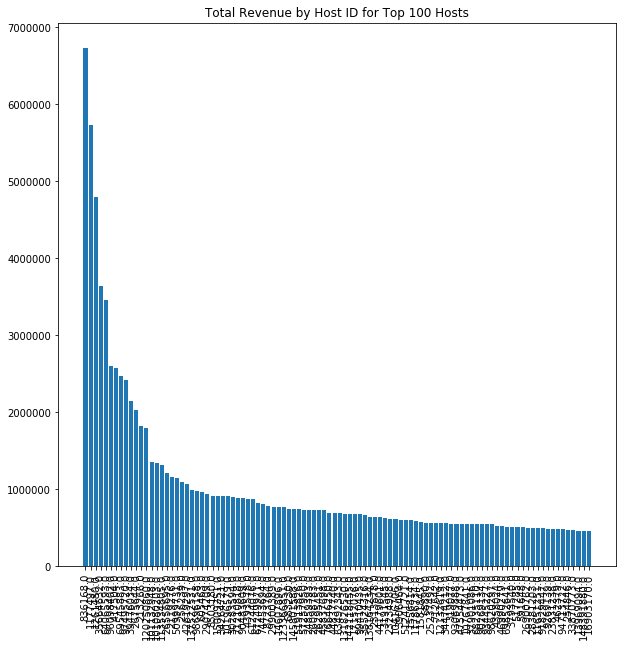

In [68]:
#make a plot using matplotlib of the number of apartments for the top 100 hosts by revenue

plt.figure(figsize = (10,10))
plt.bar(range(len(t100host_rev)),t100host_rev.values)
plt.xticks(range(len(t100host_rev.values)),list(t100host_rev.index), rotation=90)
plt.title("Total Revenue by Host ID for Top 100 Hosts")
plt.savefig("Total_Revenue_by_hostid.png")
plt.show()


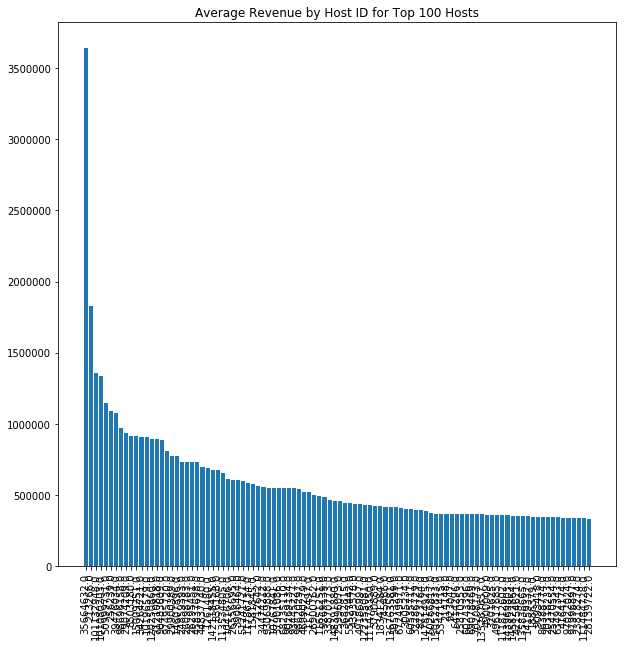

In [69]:
#make a plot with matplotlib of Average Revenue for the top 100 hosts by revenue
plt.figure(figsize = (10,10))
plt.bar(range(len(t100host_avg)),t100host_avg.values)
plt.xticks(range(len(t100host_avg.values)),list(t100host_avg.index), rotation=90)
plt.title("Average Revenue by Host ID for Top 100 Hosts")
plt.savefig("Average_Revenue_by_hostid.png")
plt.show()


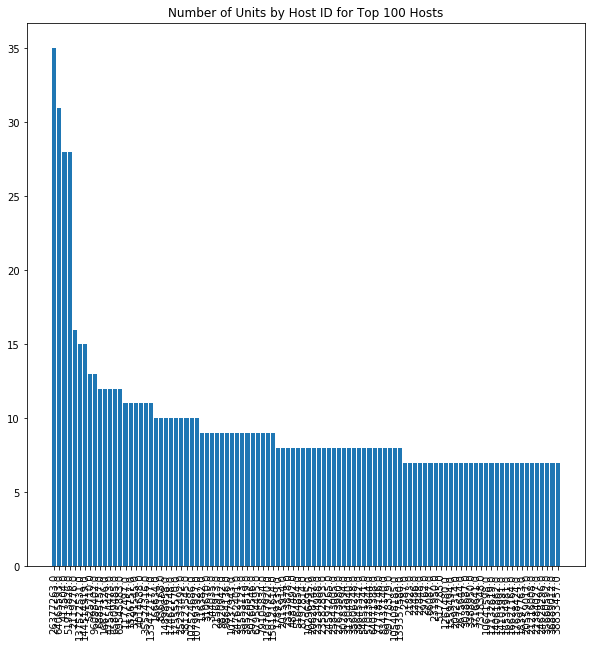

In [70]:
#make a plot with matplotlib of number of apartments for the top 100 hosts by revenue
plt.figure(figsize = (10,10))
plt.bar(range(len(t100host_count)),t100host_count.values)
plt.xticks(range(len(t100host_count.values)),list(t100host_count.index), rotation=90)
plt.title("Number of Units by Host ID for Top 100 Hosts")
plt.savefig("Number_of_Units_by_hostid.png")
plt.show()


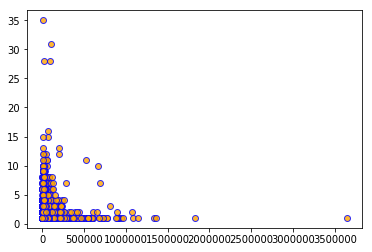

In [71]:

#Make a scatter plot
plt.scatter(x=host_revenue_mean, y=host_revenue_count, marker="o", facecolors="orange", edgecolors="blue", alpha=0.8)


In [72]:
#From host_info_df use Groupby function to create Total Revenue, Avg Revenue and Number of Units per zipcode
host_zipcode_sum=host_info_df.groupby('zipcode')['Total Spend by ID'].sum()
host_zipcode_mean=host_info_df.groupby('zipcode')['Total Spend by ID'].mean()
host_zipcode_count=host_info_df.groupby('zipcode')['Total Spend by ID'].count()

#Make a data frame from the groupby objects 
host_zipcode_df=pd.DataFrame({'Total Revenue':host_zipcode_sum,'Average Revenue':host_zipcode_mean,'Number of Units':host_zipcode_count})

host_zipcode_df.reset_index()
                                                     
# host_zipcode_dfnew=host_zipcode_df.sort_values(axis=0, by="Number of Units", ascending=False)   

host_zipcode_df.head(20)


,Total Revenue,Average Revenue,Number of Units
zipcode,,,
10000,31210,31210.000000,1
10001,18297606,61196.006689,299
10002,31662759,39877.530227,794
10003,29734090,48426.856678,614
10003-8623,58530,58530.000000,1
10004,1439488,41128.228571,35
10005,2664205,37002.847222,72
10006,1786707,38841.456522,46
10007,1074770,59709.444444,18


In [73]:
# Make a data frame of the top 100 zipcodes by Number of units 

top100zipcodes=host_zipcode_df.nlargest(100, 'Number of Units')
top100zipcodes.head()

,Total Revenue,Average Revenue,Number of Units
zipcode,,,
11211,41022563,30613.852985,1340
11221,22549862,20764.145488,1086
11216,21528529,25417.389610,847
11206,16017470,19228.655462,833
10002,31662759,39877.530227,794


In [74]:
#make a data frame of the top 20 zip codes by revenue
top20zipcodes_rev=host_zipcode_df.nlargest(20, 'Total Revenue')
top20zipcodes_rev


,Total Revenue,Average Revenue,Number of Units
zipcode,,,
11211,41022563,30613.852985,1340
10019,33274713,49369.010386,674
10002,31662759,39877.530227,794
10036,30823257,51201.423588,602
10003,29734090,48426.856678,614
10014,28938481,57646.376494,502
10012,25757104,54339.881857,474
10011,24746306,45657.391144,542
10009,24218375,34796.515805,696


In [75]:
top20zipcodes_rev.to_csv("Resources/top20zipcodesrev.csv", index=True)

In [76]:
#Make a list for plotting the total revenue generated by zip code for the top 20 zip codes

t20z_revenue = top20zipcodes_rev['Total Revenue']
t20z_revenue

zipcode
11211    41022563
10019    33274713
10002    31662759
10036    30823257
10003    29734090
10014    28938481
10012    25757104
10011    24746306
10009    24218375
10025    22699754
11221    22549862
10027    21804316
11216    21528529
10016    20613749
10013    20147512
11238    19355270
10001    18297606
11205    17293656
11222    16636270
10017    16107061
Name: Total Revenue, dtype: int64

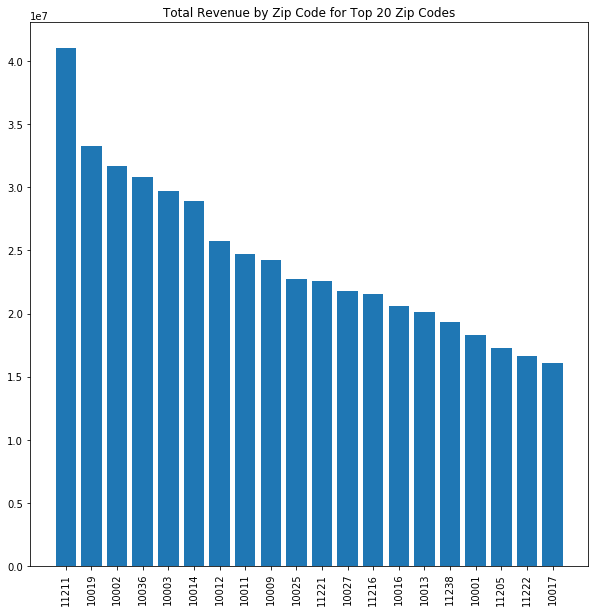

In [77]:
#make a plot with matplotlib of total revenue per zip code for the top20 zip codes
plt.figure(figsize = (10,10))
plt.bar(range(len(t20z_revenue)),t20z_revenue.values)
plt.xticks(range(len(t20z_revenue.values)),list(t20z_revenue.index), rotation=90)
plt.title("Total Revenue by Zip Code for Top 20 Zip Codes")
plt.savefig("Total_Revenue_by_Zipcode.png")
plt.show()


In [78]:
#Make a list for plotting of average revenue generated for the top 20 host ids

t20z_avg_rev = top20zipcodes_rev['Average Revenue']
t20z_avg_rev

zipcode
11211    30613.852985
10019    49369.010386
10002    39877.530227
10036    51201.423588
10003    48426.856678
10014    57646.376494
10012    54339.881857
10011    45657.391144
10009    34796.515805
10025    46707.312757
11221    20764.145488
10027    39216.395683
11216    25417.389610
10016    52586.094388
10013    64575.358974
11238    29460.076104
10001    61196.006689
11205    41772.115942
11222    28101.807432
10017    82600.312821
Name: Average Revenue, dtype: float64

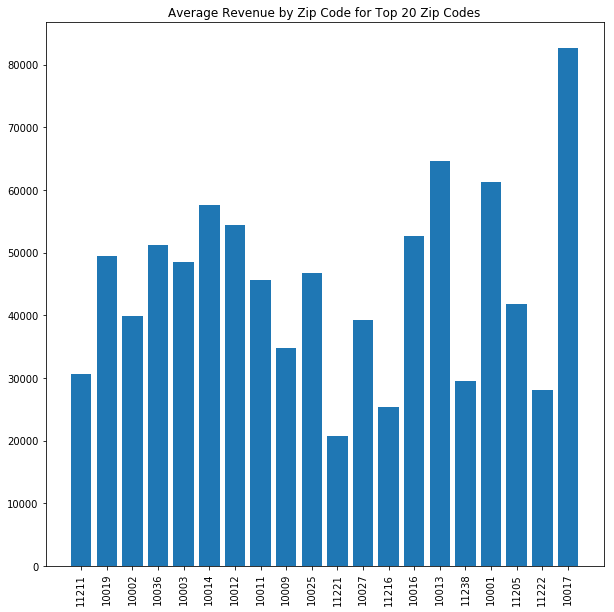

In [79]:
#make a plot with matplotlib of average revenue per zipcode for the top20 zipcodes
plt.figure(figsize = (10,10))
plt.bar(range(len(t20z_avg_rev)),t20z_avg_rev.values)
plt.xticks(range(len(t20z_avg_rev.values)),list(t20z_avg_rev.index), rotation=90)
plt.title("Average Revenue by Zip Code for Top 20 Zip Codes")
plt.savefig("Average_Revenue_by_Zipcode.png")
plt.show()

In [80]:
#Make a list for plotting of number of units for the top 20 host ids

t20z_count = top20zipcodes_rev['Number of Units']
t20z_count

zipcode
11211    1340
10019     674
10002     794
10036     602
10003     614
10014     502
10012     474
10011     542
10009     696
10025     486
11221    1086
10027     556
11216     847
10016     392
10013     312
11238     657
10001     299
11205     414
11222     592
10017     195
Name: Number of Units, dtype: int64

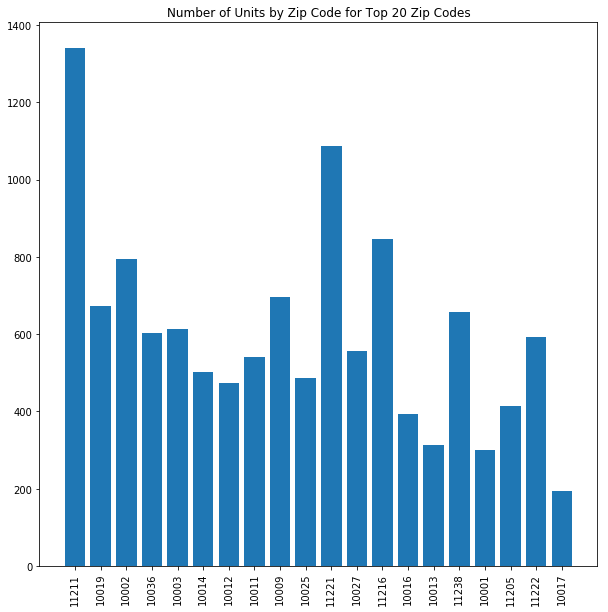

In [81]:
#make a plot with matplotlib of number of units per zipcode for the top20 zipcodes
plt.figure(figsize = (10,10))
plt.bar(range(len(t20z_count)),t20z_count.values)
plt.xticks(range(len(t20z_count.values)),list(t20z_count.index), rotation=90)
plt.title("Number of Units by Zip Code for Top 20 Zip Codes")
plt.savefig("Number_of_Units_by_Zipcode.png")
plt.show()
        

In [82]:
top20host_count=host_revenue_df.nlargest(20, 'Number of Units')
top20host_count



,Total Revenue,Average Revenue,Number of Units
host_id_x,,,
26377263.0,422191,12062.600000,35
64065593.0,3450975,111321.774194,31
417504.0,2575904,91996.571429,28
51913826.0,738516,26375.571429,28
2119276.0,1157920,72370.000000,16
137522531.0,985346,65689.733333,15
144514919.0,141414,9427.600000,15
525710.0,167215,12862.692308,13
96098402.0,2595158,199627.538462,13


In [83]:
top20host_count.to_csv("Resources/top20hosts_rev.csv", index=True)

In [84]:
top100host_count=host_revenue_df.nlargest(100, 'Number of Units')
top100host_count

,Total Revenue,Average Revenue,Number of Units
host_id_x,,,
26377263.0,422191,12062.600000,35
64065593.0,3450975,111321.774194,31
417504.0,2575904,91996.571429,28
51913826.0,738516,26375.571429,28
2119276.0,1157920,72370.000000,16
137522531.0,985346,65689.733333,15
144514919.0,141414,9427.600000,15
525710.0,167215,12862.692308,13
96098402.0,2595158,199627.538462,13


In [85]:
host_info_df.head()

,id,Total Spend by ID,Average Spend by ID,Number or Listings by ID,host_id_x,host_is_superhost,zipcode,neighbourhood_x,accommodates,bedrooms,square_feet,price_x,cleaning_fee
0,2515,26468,90.643836,292,2758.0,f,10026,Harlem,2.0,1.0,NaN,$59.00,$40.00
1,2539,49446,135.468493,365,2787.0,t,11218,Kensington,6.0,2.0,NaN,$150.00,$25.00
2,2595,79984,220.341598,363,2845.0,f,10018,Midtown,2.0,0.0,NaN,$225.00,$98.00
3,3330,23590,70.000000,337,4177.0,f,11206,Williamsburg,2.0,1.0,NaN,$70.00,$95.00
4,3647,54750,150.000000,365,4632.0,f,10027,Harlem,2.0,1.0,NaN,$150.00,$75.00


In [86]:
host_info_df['host_is_superhost']=host_info_df['host_is_superhost'].str.replace('f','False')
host_info_df['host_is_superhost']=host_info_df['host_is_superhost'].str.replace('t','True')

host_info_df.head()


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,Total Spend by ID,Average Spend by ID,Number or Listings by ID,host_id_x,host_is_superhost,zipcode,neighbourhood_x,accommodates,bedrooms,square_feet,price_x,cleaning_fee
0,2515,26468,90.643836,292,2758.0,False,10026,Harlem,2.0,1.0,NaN,$59.00,$40.00
1,2539,49446,135.468493,365,2787.0,True,11218,Kensington,6.0,2.0,NaN,$150.00,$25.00
2,2595,79984,220.341598,363,2845.0,False,10018,Midtown,2.0,0.0,NaN,$225.00,$98.00
3,3330,23590,70.000000,337,4177.0,False,11206,Williamsburg,2.0,1.0,NaN,$70.00,$95.00
4,3647,54750,150.000000,365,4632.0,False,10027,Harlem,2.0,1.0,NaN,$150.00,$75.00


In [87]:
#From host_info_df use Groupby function to create Total Revenue, Avg Revenue and Number of Units for superhosts and non-superhosts
superhost_sum=host_info_df.groupby('host_is_superhost')['Total Spend by ID'].sum()
superhost_mean=host_info_df.groupby('host_is_superhost')['Total Spend by ID'].mean()
superhost_count=host_info_df.groupby('host_is_superhost')['Total Spend by ID'].count()

#Make a data frame from the groupby objects 
superhost_df=pd.DataFrame({'Total Revenue':superhost_sum,'Average Revenue':superhost_mean,'Number of Units':superhost_count})

superhost_df.reset_index()
                                                     
# host_zipcode_dfnew=host_zipcode_df.sort_values(axis=0, by="Number of Units", ascending=False)   

superhost_df.head(20)




,Total Revenue,Average Revenue,Number of Units
host_is_superhost,,,
False,790221791,32648.396587,24204
True,154779158,35442.903137,4367


In [88]:
superhost_sum

host_is_superhost
False    790221791
True     154779158
Name: Total Spend by ID, dtype: int64

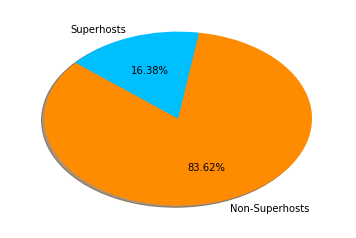

In [89]:
# Make a pie chart

# Labels for the sections of our pie chart
labels = ["Non-Superhosts", "Superhosts"]

# The colors of each section of the pie chart
colors = ["darkorange", "deepskyblue"]

plt.pie(superhost_sum, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=140)
plt.savefig("Superhostspiechart.png")
